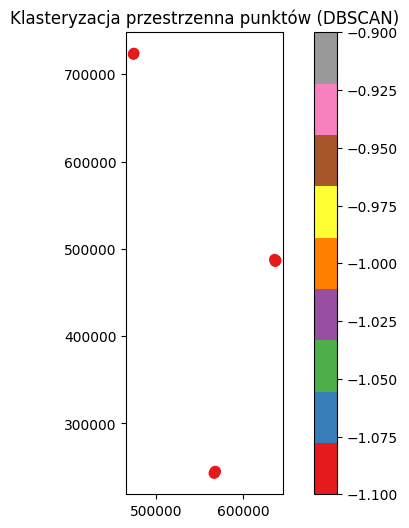

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Przykładowe dane: lista punktów (longitude, latitude)
data = [
    (19.94, 50.06),  # Kraków
    (19.95, 50.07),
    (19.93, 50.05),
    (21.01, 52.23),  # Warszawa
    (21.00, 52.22),
    (20.99, 52.24),
    (18.60, 54.37),  # Gdańsk
    (18.61, 54.38),
]

# Tworzenie GeoDataFrame
df = pd.DataFrame(data, columns=['lon', 'lat'])
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs='EPSG:4326')

# Konwersja do układu metrycznego (np. UTM), żeby DBSCAN miał sens
gdf = gdf.to_crs(epsg=2180)  # Polska: PUWG 1992

# Ekstrakcja współrzędnych X, Y
coords = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()

# Klasteryzacja DBSCAN
db = DBSCAN(eps=500, min_samples=2).fit(coords)  # eps = promień sąsiedztwa w metrach
gdf['cluster'] = db.labels_

# Kolorowanie klastrów
fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(ax=ax, column='cluster', cmap='Set1', legend=True, markersize=50)
ax.set_title("Klasteryzacja przestrzenna punktów (DBSCAN)")
plt.show()


In [ ]:
percentile_cont(0.5) WITHIN GROUP (ORDER BY value_column) AS median_value